<a href="https://colab.research.google.com/github/nspeer12/AI_CAP4630/blob/master/hw3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import tensorflow.keras as keras
import matplotlib.pyplot as plt

Implement the function get_random_data(w, b, mu, sigma, m) that generates random data for logisitic regression with two features features x_1 and x_2. This function should return the array data of shape (m, 2) and the array labels of shape (m, 1).

The entries of the arrays should be generated as follows. For each row i in {0, 1, ..., m-1}:

Choose class label c=0 with probability 1/2 and c=1 with probability 1/2.
Choose the first feature x_1 uniformly at random in the interval [0, 1).
Set the second feature x_2 to be x_2 = w * x_1 + b + (-1)^c * n, where the "noise" n is chosen according to the normal distribution with mean mu and standard deviation sigma.
The ith row of the array data consists of the features x_1 and x_2.
The ith entry of the vector labels is the class label c.
Implement the function display_random_data that takes as input the above two arrays labels and data. It should create scatter plot of the 2D points stored in data. Use red dots to plot the points whose labels are 1 and blue dots to plot the points whose labels are 0.

Hints: You should see that the 2D points (feature vectors) corresponding to different classes are approximately separated by the line y = w * x + b, where w and b are the parameters that you used to generate the data. Note that the smaller the parameter mu, the closer the points are to this line. Also, the larger the parameter sigma, the more points can be on the wrong side of this line.

Experiment with different values of mu and sigma. Make sure that the parameter m is large enough so you have enough data points.

Split the data/labels into a training set (80%) and a test set (20%).

Links to the numpy documentation of the functions that can be used to draw samples according to the uniform and normal distributions:

Normal distribution
Uniform distribution
You can learn more about the normal distribution on https://en.wikipedia.org/wiki/Normal_distribution. To gain some intuition, it would be helpful to plot the Gaussian function for different parameters mu and sigma in a seperate notebook (that you do not have to submit). Later in the semester, you will need to work with normal distribution to understand variational autoencoders.


In [0]:
np.random.seed(999)

def get_random_data(w, b, mu, sigma, m):
  x_1 = np.random.default_rng().normal(mu, sigma, m)
  c = [0 if np.random.rand(1) < .5 else 1 for x in range(m)]
  
  x_2 = [None] * m
  for i in range(m):
    x_2[i] = w * x_1[i] + b + (-1)**c[i] # and noise

  colors = [None] * m
  for x in range(len(colors)):
    colors[x] = ('blue' if c[x] == 1 else 'red')

  plt.scatter(x_1, x_2, c=colors)
  print(colors)

['blue', 'blue', 'red', 'blue', 'red', 'red', 'red', 'blue', 'blue', 'blue', 'blue', 'red', 'red', 'red', 'blue', 'red', 'blue', 'red', 'blue', 'red', 'red', 'blue', 'red', 'red', 'red', 'red', 'blue', 'red', 'blue', 'blue', 'red', 'blue', 'red', 'blue', 'red', 'red', 'blue', 'red', 'blue', 'blue', 'blue', 'blue', 'blue', 'red', 'red', 'red', 'blue', 'blue', 'blue', 'red', 'blue', 'blue', 'blue', 'red', 'blue', 'blue', 'red', 'red', 'blue', 'blue', 'blue', 'red', 'blue', 'blue', 'red', 'blue', 'blue', 'blue', 'blue', 'red', 'blue', 'blue', 'red', 'blue', 'blue', 'blue', 'blue', 'red', 'blue', 'red', 'blue', 'blue', 'red', 'red', 'blue', 'red', 'red', 'red', 'blue', 'red', 'blue', 'blue', 'blue', 'red', 'blue', 'red', 'blue', 'blue', 'blue', 'red', 'blue', 'red', 'blue', 'blue', 'blue', 'blue', 'red', 'red', 'blue', 'blue', 'blue', 'blue', 'red', 'red', 'blue', 'red', 'blue', 'blue', 'red', 'blue', 'blue', 'red', 'blue', 'red', 'blue', 'red', 'blue', 'blue', 'red', 'blue', 'red', 'red',

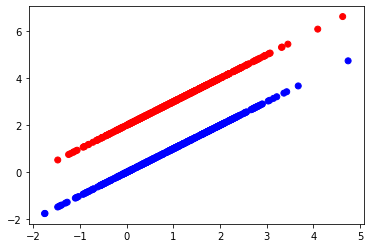

In [65]:
get_random_data(1,1,1,1,1000)